In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import glob
import matplotlib.pyplot as plt
import pymc3 as pm
import theano
from sklearn.metrics import r2_score
import seaborn as sns
from theano import tensor as tt
from nilearn import datasets
from nilearn.signal import clean
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from nilearn.input_data import NiftiLabelsMasker
from sklearn.decomposition import NMF
from nilearn.image import resample_to_img
import nibabel as nib
import arviz as az
import warnings
from factor_analyzer import FactorAnalyzer
from itertools import combinations
import matplotlib
from nilearn import plotting, surface
from nilearn import datasets as ds
from nilearn.datasets import fetch_surf_fsaverage
from symbol import factor


Initialize

In [ ]:
export_figures = True
PATH = "..."
scaler = StandardScaler()
imp = SimpleImputer(missing_values=999,strategy="median")

In [2]:
# Initialize plotting
matplotlib.rcParams["svg.fonttype"] = "none"
plt.rcParams.update({"font.family": "Helvetica Neue"})
cm = 1 / 2.54  # centimeters in inches

color = ['#3f005c', '#ffa600']
my_colors = []
for c in color:
    my_colors.append(matplotlib.colors.to_rgb(c))


Define BHM

In [43]:
b_all = []
b_left = []
b_right = []
b_inverse = []
nmf_left = []
nmf_right = []
nmf_left_ms = []
nmf_right_ms = []
mask_vars = []
mask = []
for j in range(4):
    with hierarchical_all_parcels_education_log_model:
        hierarchical_all_parcels_education_log_trace = pm.load_trace(
            PATH + "/unimodal_fa_v" + str(j+1) + ".trace")

    # left betas
    tmp_left = []
    for i in np.arange(1, n_components+1):
        tmp_left.append(pd.DataFrame(
            hierarchical_all_parcels_education_log_trace[1000:]["b_%i" % i])[0].mean())
    tmp_left_inverse = nmf.inverse_transform(tmp_left)
    nmf_left.append(tmp_left)

    # right betas
    tmp_right = []
    for i in np.arange(1, n_components+1):
        tmp_right.append(pd.DataFrame(
            hierarchical_all_parcels_education_log_trace[1000:]["b_%i" % i])[1].mean())
    tmp_right_inverse = nmf.inverse_transform(tmp_right)
    nmf_right.append(tmp_right)

    tmp_inverse = pd.DataFrame(tmp_left_inverse)
    tmp_inverse = tmp_inverse.rename(columns={0: "left"})
    tmp_inverse["right"] = pd.DataFrame(tmp_right_inverse)
    b_inverse.append(tmp_inverse)

    # Scale regional loadings
    b = np.concatenate((tmp_left_inverse, tmp_right_inverse))
    b = np.matrix.flatten(scaler.fit_transform(np.abs(b).reshape(-1, 1)))
    b_all.append(b)

    tmp_left_inverse = b[0:int(len(b)/2)]
    tmp_right_inverse = b[int(len(b)/2):len(b)]

    b_left.append((np.matrix.flatten(tmp_left_inverse)))
    b_right.append((np.matrix.flatten(tmp_right_inverse)))

Plot comparisons

In [44]:
cov_age = []
cov_les = []
cov_iq = []
cov_ed = []
cov_male = []
cov_female = []
cov_age2 = []
sigma_L = []
sigma_R = []
for j in range(n_comp):
    with hierarchical_all_parcels_education_log_model:
        hierarchical_all_parcels_education_log_trace = pm.load_trace(
            PATH + "/unimodal_fa_v" + str(j+1) + ".trace")
    cov_age.append(np.array(
        hierarchical_all_parcels_education_log_trace[1000:]['cov2_age'])[:, 0])
    cov_les.append(np.array(
        hierarchical_all_parcels_education_log_trace[1000:]['cov1_lesions'])[:, 0])
    cov_iq.append(np.array(
        hierarchical_all_parcels_education_log_trace[1000:]['cov7_IQCode'])[:, 0])
    cov_ed.append(np.array(
        hierarchical_all_parcels_education_log_trace[1000:]['cov6_ed_years'])[:, 0])
    cov_male.append(np.array(
        hierarchical_all_parcels_education_log_trace[1000:]['cov4_sex_m'])[:, 0])
    cov_female.append(np.array(
        hierarchical_all_parcels_education_log_trace[1000:]['cov5_sex_w'])[:, 0])
    cov_age2.append(np.array(
        hierarchical_all_parcels_education_log_trace[1000:]['cov3_age_2'])[:, 0])

    sigma_L.append(np.array(
        hierarchical_all_parcels_education_log_trace[1000:]['sigma_b_all'])[:, 0])
    sigma_R.append(np.array(
        hierarchical_all_parcels_education_log_trace[1000:]['sigma_b_all'])[:, 1])


Inverse-projected betas per region

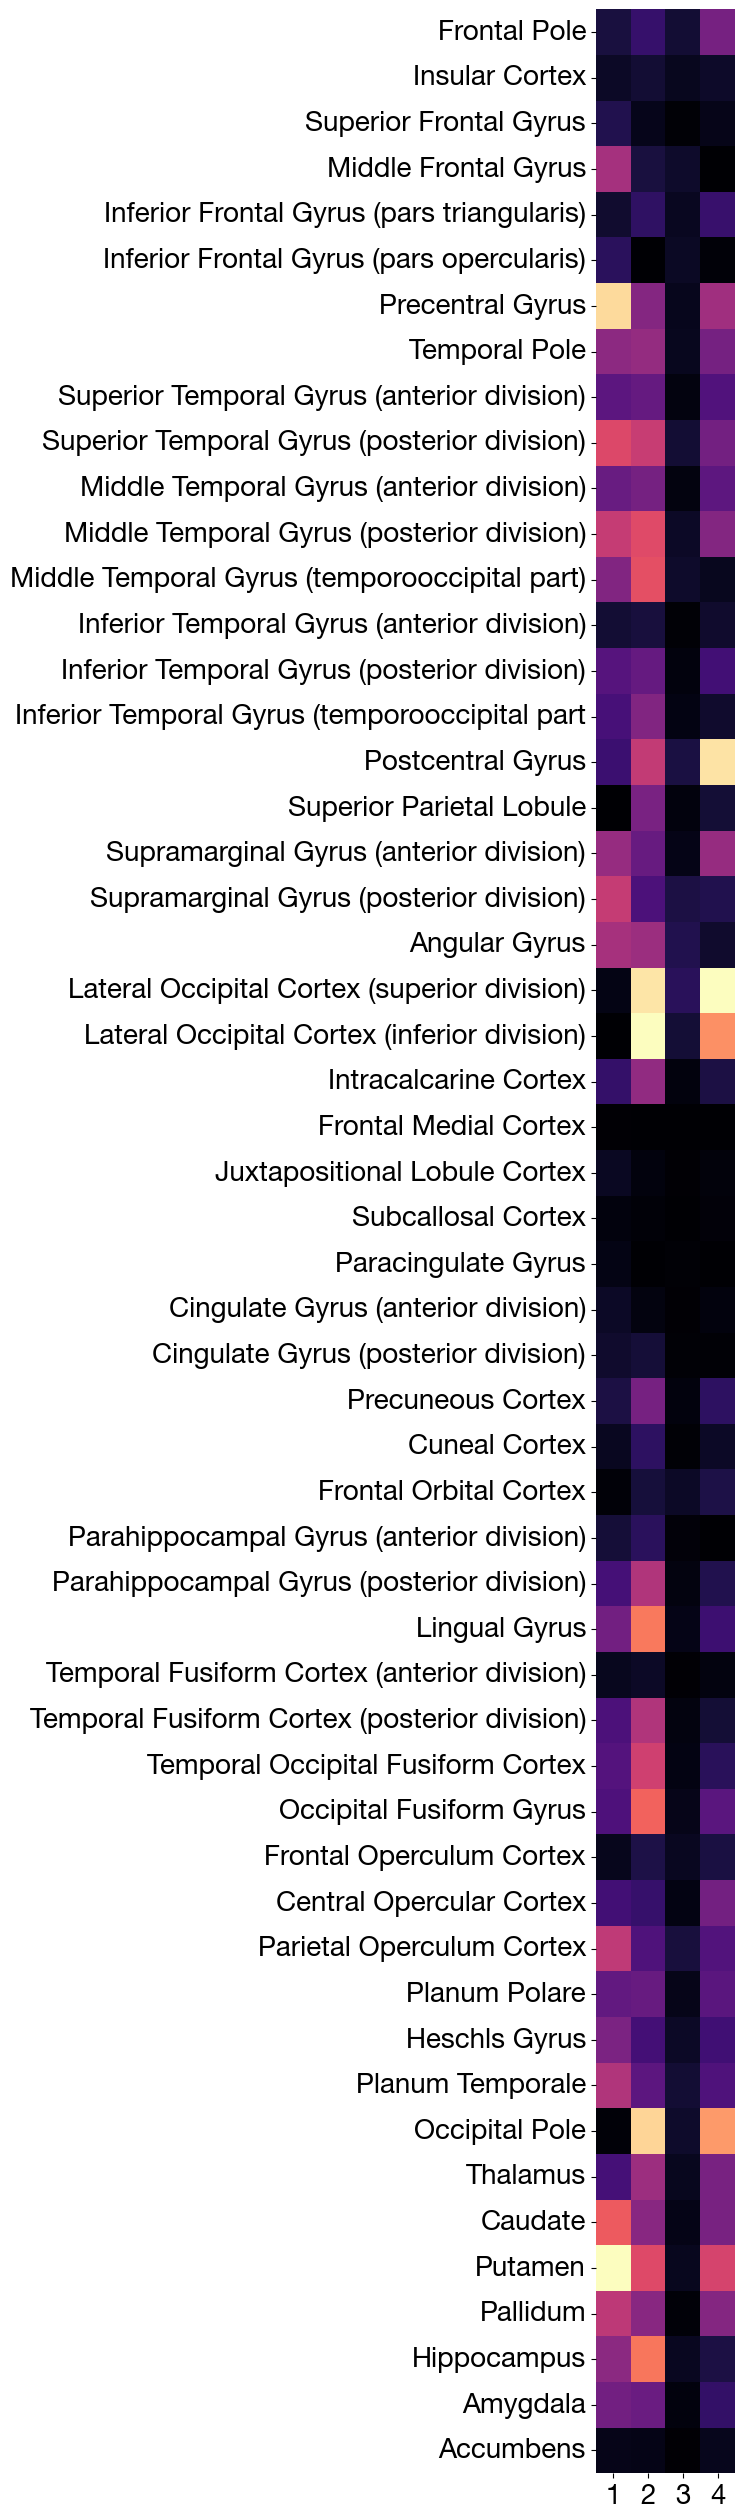

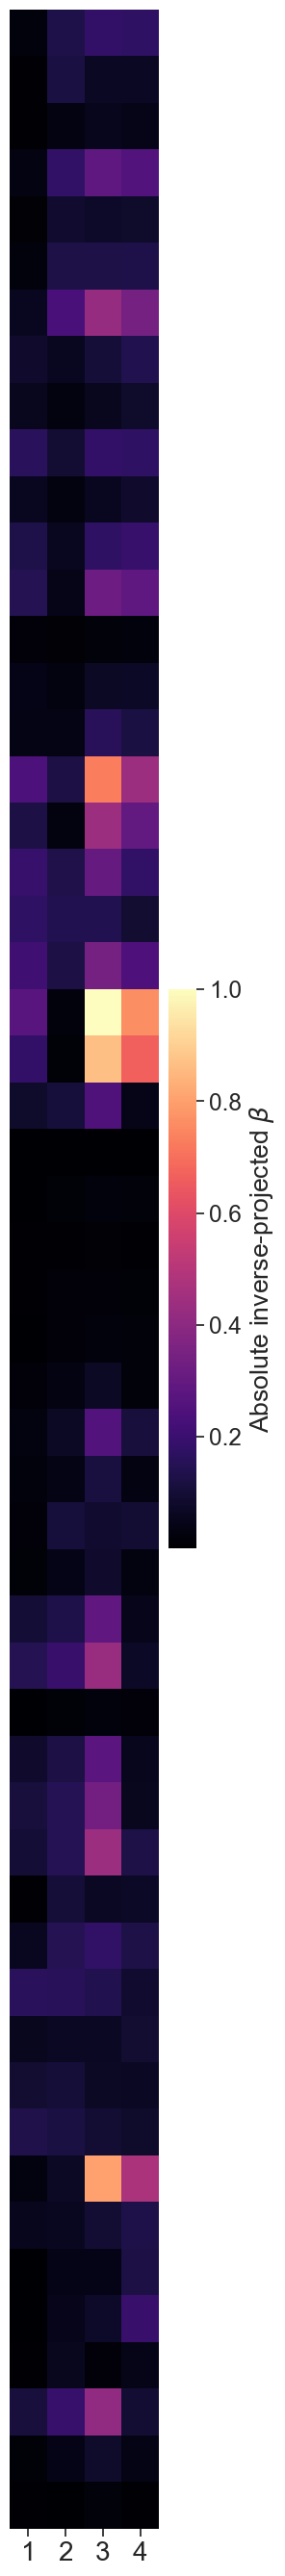

In [47]:
my_regions = ['Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus',
              'Middle Frontal Gyrus', 'Inferior Frontal Gyrus (pars triangularis)',
              'Inferior Frontal Gyrus (pars opercularis)', 'Precentral Gyrus',
              'Temporal Pole', 'Superior Temporal Gyrus (anterior division)',
              'Superior Temporal Gyrus (posterior division)',
              'Middle Temporal Gyrus (anterior division)',
              'Middle Temporal Gyrus (posterior division)',
              'Middle Temporal Gyrus (temporooccipital part)',
              'Inferior Temporal Gyrus (anterior division)',
              'Inferior Temporal Gyrus (posterior division)',
              'Inferior Temporal Gyrus (temporooccipital part', 'Postcentral Gyrus',
              'Superior Parietal Lobule', 'Supramarginal Gyrus (anterior division)',
              'Supramarginal Gyrus (posterior division)', 'Angular Gyrus',
              'Lateral Occipital Cortex (superior division)',
              'Lateral Occipital Cortex (inferior division)', 'Intracalcarine Cortex',
              'Frontal Medial Cortex',
              'Juxtapositional Lobule Cortex',
              'Subcallosal Cortex', 'Paracingulate Gyrus',
              'Cingulate Gyrus (anterior division)',
              'Cingulate Gyrus (posterior division)', 'Precuneous Cortex',
              'Cuneal Cortex', 'Frontal Orbital Cortex',
              'Parahippocampal Gyrus (anterior division)',
              'Parahippocampal Gyrus (posterior division)', 'Lingual Gyrus',
              'Temporal Fusiform Cortex (anterior division)',
              'Temporal Fusiform Cortex (posterior division)',
              'Temporal Occipital Fusiform Cortex', 'Occipital Fusiform Gyrus',
              'Frontal Operculum Cortex', 'Central Opercular Cortex',
              'Parietal Operculum Cortex', 'Planum Polare',
              'Heschl''s Gyrus', 'Planum Temporale',
              'Occipital Pole', 'Thalamus', 'Caudate', 'Putamen', 'Pallidum',
              'Hippocampus', 'Amygdala', 'Accumbens']

fig, axs = plt.subplots(1, 1, figsize=(1.8, 32))
sns.set(style="white",font_scale=1.6)
g = sns.heatmap(np.array(b_left).T,cmap='magma', cbar=False,
                cbar_kws={'shrink': 12, 'label': 'Absolute inverse-projected '+r'$\beta$','location':"right"},
                vmin=np.min([b_left, b_right]), vmax=np.max([b_left, b_right]))
g.set_yticks(np.arange(0.5, len(lesions_collapsed_all.columns)+0.5), my_regions,fontsize=20,
            rotation=0, verticalalignment="center")
g.set_xticks(np.arange(0.5, 4.5), np.arange(1, n_comp+1), fontsize=20, rotation=0, horizontalalignment='center')
g.set_title('')
plt.tight_layout()
g.tick_params(left=True, right=False, top=False, bottom=True, labelright=False,
              labelleft=True, labeltop=False, labelbottom=True, rotation=0)
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(2.5, 34))
sns.set(style="white",font_scale=1.6)
g = sns.heatmap(np.array(b_right).T,cmap='magma', cbar=True,
                cbar_kws={'shrink': 2, 'label': 'Absolute inverse-projected ' + r'$\beta$','location':"right"},
                vmin=np.min([b_left, b_right]), vmax=np.max([b_left, b_right]))
g.set_yticks(np.arange(0.5, len(lesions_collapsed_all.columns)+0.5), my_regions,fontsize=20,
            rotation=0, verticalalignment="center")
g.set_xticks(np.arange(0.5, 4.5), np.arange(1, n_comp+1), fontsize=20, rotation=0, horizontalalignment='center')
g.set_title('')
plt.tight_layout()
g.tick_params(left=False, right=False, top=False, bottom=True, labelright=False,
              labelleft=False, labeltop=False, labelbottom=True, rotation=0)
plt.show()




In [ ]:
mu_left_mean = np.zeros((n_comp, n_components))
mu_left_sig = np.zeros((n_comp, n_components))
mu_right_mean = np.zeros((n_comp, n_components))
mu_right_sig = np.zeros((n_comp, n_components))
mu_left_reg = np.zeros((n_comp, n_regions))
mu_right_reg = np.zeros((n_comp, n_regions))
for i in range(n_comp):
    with hierarchical_all_parcels_education_log_model:
        hierarchical_all_parcels_education_log_trace = pm.load_trace(
            PATH + "/unimodal_fa_v" + str(i+1) + ".trace")
    for j in range(n_components):
        mu_left = pm.summary(
            hierarchical_all_parcels_education_log_trace[1000:]["b_"+str(j+1)][:, 0], hdi_prob=0.90)
        mu_left_mean[i, j] = mu_left.loc[:, 'mean'].values[0]
        mu_left_sig[i, j] = (mu_left.loc[:, 'hdi_5%'].values[0]
                             * mu_left.loc[:, 'hdi_95%'].values[0]) > 0
        mu_right = pm.summary(
            hierarchical_all_parcels_education_log_trace[1000:]["b_"+str(j+1)][:, 1], hdi_prob=0.90)
        mu_right_mean[i, j] = mu_right.loc[:, 'mean'].values[0]
        mu_right_sig[i, j] = (mu_right.loc[:, 'hdi_5%'].values[0]
                              * mu_right.loc[:, 'hdi_95%'].values[0]) > 0

    mu_left_reg[i, :] = nmf.inverse_transform(mu_left_mean[i, :])
    mu_right_reg[i, :] = nmf.inverse_transform(mu_right_mean[i, :])


In [57]:
with hierarchical_all_parcels_education_log_model:
    hierarchical_all_parcels_education_log_trace = pm.load_trace(
        PATH + "/unimodal_fa.trace")


In [70]:
pm.summary(
    hierarchical_all_parcels_education_log_trace[1000:], hdi_prob=0.9)


Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-0.025,0.578,-0.934,0.955,0.013,0.010,1971.0,1929.0,1.00
b_1[0],-0.007,0.009,-0.022,0.006,0.000,0.000,609.0,1432.0,1.01
b_1[1],-0.000,0.006,-0.009,0.010,0.000,0.000,2289.0,756.0,1.02
b_2[0],-0.007,0.013,-0.030,0.013,0.000,0.000,873.0,1558.0,1.00
b_2[1],-0.001,0.009,-0.017,0.012,0.000,0.000,3042.0,841.0,1.02
b_3[0],0.004,0.021,-0.028,0.041,0.001,0.001,2062.0,1163.0,1.02
b_3[1],0.000,0.012,-0.017,0.019,0.000,0.000,3650.0,641.0,1.02
b_4[0],0.004,0.028,-0.037,0.049,0.001,0.001,2025.0,654.0,1.02
b_4[1],0.002,0.014,-0.017,0.024,0.000,0.001,2554.0,586.0,1.03
b_5[0],-0.015,0.028,-0.061,0.023,0.001,0.001,586.0,765.0,1.00


Top regions per component

(54, 3)


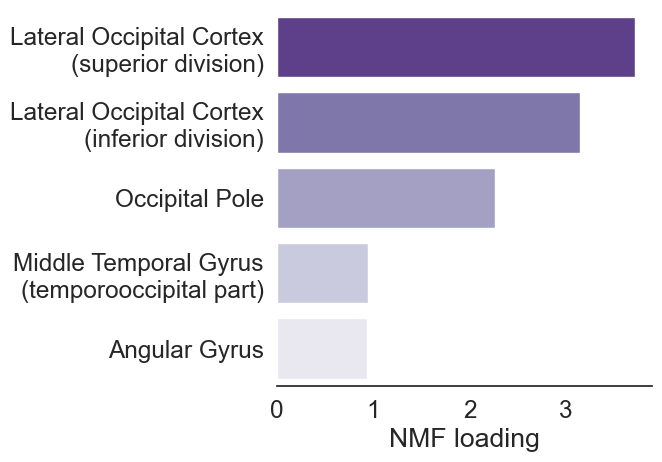

In [69]:
def map_divergent(X, cmap):
    colors_div = sns.color_palette(cmap, n_colors=100)
    # minmax_scale = MinMaxScaler()
    X_min = np.min(X)
    X_max = np.max(X)
    X_scaled = ((X-X_min)/(X_max-X_min)*99).astype(int)
    clrs = []
    for c in X_scaled:
        clrs.append(colors_div[c])
    return clrs


a = (lesions_collapsed_all.columns)
my_regions = ['Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus',
              'Middle Frontal Gyrus', 'Inferior Frontal Gyrus\n(pars triangularis)',
              'Inferior Frontal Gyrus\n(pars opercularis)', 'Precentral Gyrus',
              'Temporal Pole', 'Superior Temporal Gyrus\n(anterior division)',
              'Superior Temporal Gyrus\n(posterior division)',
              'Middle Temporal Gyrus\n(anterior division)',
              'Middle Temporal Gyrus\n(posterior division)',
              'Middle Temporal Gyrus\n(temporooccipital part)',
              'Inferior Temporal Gyrus\n(anterior division)',
              'Inferior Temporal Gyrus\n(posterior division)',
              'Inferior Temporal Gyrus\n(temporooccipital part', 'Postcentral Gyrus',
              'Superior Parietal Lobule', 'Supramarginal Gyrus\n(anterior division)',
              'Supramarginal Gyrus\n(posterior division)', 'Angular Gyrus',
              'Lateral Occipital Cortex\n(superior division)',
              'Lateral Occipital Cortex\n(inferior division)', 'Intracalcarine Cortex',
              'Frontal Medial Cortex',
              'Juxtapositional Lobule Cortex',
              'Subcallosal Cortex', 'Paracingulate Gyrus',
              'Cingulate Gyrus\n(anterior division)',
              'Cingulate Gyrus\n(posterior division)', 'Precuneous Cortex',
              'Cuneal Cortex', 'Frontal Orbital Cortex',
              'Parahippocampal Gyrus\n(anterior division)',
              'Parahippocampal Gyrus\n(posterior division)', 'Lingual Gyrus',
              'Temporal Fusiform Cortex\n(anterior division)',
              'Temporal Fusiform Cortex\n(posterior division)',
              'Temporal Occipital Fusiform Cortex', 'Occipital Fusiform Gyrus',
              'Frontal Operculum Cortex', 'Central Opercular Cortex',
              'Parietal Operculum_Cortex', 'Planum Polare',
              'Heschl''s Gyrus', 'Planum Temporale',
              'Occipital Pole', 'Thalamus', 'Caudate', 'Putamen', 'Pallidum',
              'Hippocampus', 'Amygdala', 'Accumbens']
var = 4
x = nmf.components_.T[:, var-1]
idx = np.argsort(-x)
y_lab = np.array([my_regions[idx[i]] for i in range(5)])
cmap = map_divergent(x[idx].T, 'Purples')
print(np.shape(cmap))
sns.set_theme(style="white", palette='colorblind', font_scale=1.6)
fig, ax = plt.subplots(1, figsize=(7, 5))
g = sns.barplot(x=x[idx[:5]], y=y_lab, palette='Purples_r', ci=None)
g.set_xlabel('NMF loading')
plt.tight_layout()
axs.xaxis.grid()
sns.despine(left=True)
plt.show()


Correlation of beta values

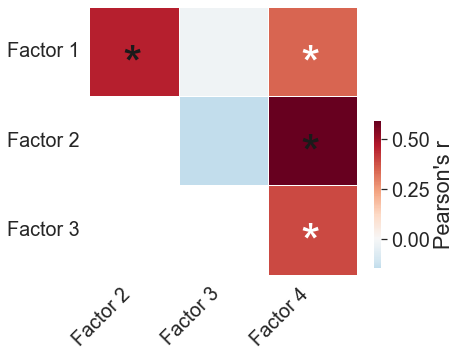

In [ ]:
# Correlation matrix of outcomes
def map_pearson(X, n):
    r = np.zeros((n, n))
    p = np.zeros((n, n))
    for i in range(n-1):
        for j in np.arange(i+1, n):
            r[j, i], p[j, i] = pearsonr(X[i], X[j])
    p_sig, p_adj = fdrcorrection(p[np.tril_indices(p.shape[0], k=-1)])
    p = np.zeros((n, n))
    p[np.tril_indices(p.shape[0], k=-1)] = p_sig
    return r, p


(r, p) = map_pearson(np.abs(np.concatenate(
    (mu_left_reg, mu_right_reg), axis=1)), len(fact_names))
r = np.array(r + r.T)
p = np.array(p + p.T)
mask = np.triu(np.ones((r.shape[0]-1, r.shape[0]-1)), k=1)
mask_down = np.triu(np.ones((r.shape[0], r.shape[0])), k=0)
mask_up = np.tril(np.ones((r.shape[0], r.shape[0])), k=0)
sns.set_theme(style="white", palette='colorblind', font_scale=1.8)
fig, ax = plt.subplots(1, figsize=(6, 6))
g = sns.heatmap(data=r, mask=mask_up,
                cbar=True, cmap='RdBu_r', linewidths=0.5,
                square=True, annot=False, center=0,
                cbar_kws={'label': "Pearson\'s r",
                          'shrink': 0.45,
                          'anchor': (-1.25, 0.2)})
for i in range(r.shape[0]):
    for j in range(i+1):
        if p[i, j] == 1:
            if np.abs(r[i, j]) > 0.4:
                ax.text(i + 0.475, j + 0.685, '*', color='k', size=50,
                        ha='center', va='center')
            else:
                ax.text(i + 0.475, j + 0.685, '*', color='w', size=50,
                        ha='center', va='center')
g.set_xticklabels(fact_names, rotation=45,
                  horizontalalignment='right')
g.set_yticklabels(fact_names, rotation=0)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('')
ax.set_xlim([1, 4])
ax.set_ylim([3, 0])
plt.show()


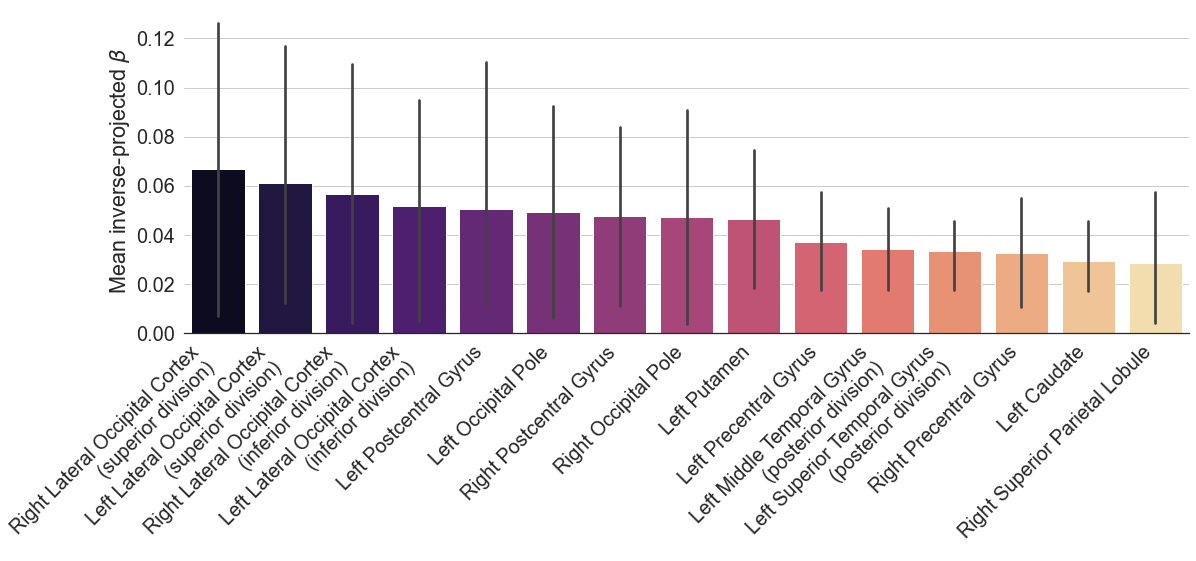

In [ ]:
left_regions = ['Left '+region for region in my_regions]
right_regions = ['Right '+region for region in my_regions]
reduced_regions = np.concatenate((left_regions, right_regions))
x = np.abs(np.concatenate((mu_left_reg, mu_right_reg), axis=1))
idx = np.argsort(-np.mean(x, axis=0))[0:15]
x = x[:, idx]
reduced_regions = reduced_regions[idx]
df = pd.DataFrame(data=x.T, columns=fact_names,
                  index=reduced_regions)
df = pd.melt(df, ignore_index=False)
df = df.reset_index(drop=False)

sns.set_theme(style="white", palette='colorblind', font_scale=1.8)
fig, ax = plt.subplots(1, figsize=(18, 6))
g = sns.barplot(x='index', y='value', data=df, ci=95,
                palette='magma')
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right')
g.set_xlabel('')
ax.yaxis.grid()
sns.despine(left=True)
g.set_ylabel('Mean inverse-projected '+r'$\beta$')
plt.show()
